In [1]:
from kf import *
import matplotlib.pyplot as plt

In [2]:
A = np.array([[0,1], [0,0]])

In [3]:
B = np.array([[0],[1]])

In [4]:
C = np.array([[0,0]])
D = np.array([[0]])

In [5]:
H = np.array([[1,0]])

In [6]:
Q = np.array([[0.01]])

In [7]:
R = np.array([[1]])

In [8]:
x0 = np.array([[0],[0]])

---

In [9]:
dt = 0.1

In [10]:
t_steps = 100

In [11]:
state_space = signal.StateSpace(A,B,C,D)

In [12]:
time = np.arange(0,t_steps,dt)

In [13]:
F = state_space.to_discrete(dt).A

In [14]:
G = state_space.to_discrete(dt).B

In [15]:
z, x = xtrue(F, G, H, Q, R, x0, t_steps)

---

In [16]:
P0 = np.ones((2,2)) * Q

In [17]:
xest, xpred, innov = xestim(F, G, H, Q, R, x0, P0, z, t_steps)

In [18]:
W, Pest, Ppred, S = covars(F, G, H, Q, R, P0, t_steps)

---

## Plots

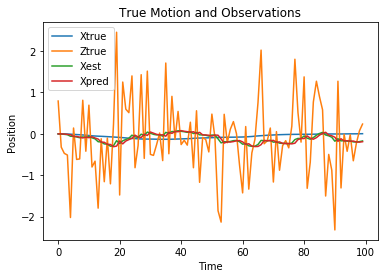

In [20]:
dims=np.shape(x)
tsteps=dims[1]
t=np.arange(0,tsteps)
fig, ax = plt.subplots()
ax.plot(t, x[0,:], label='Xtrue')
ax.plot(t, z[0,:], label='Ztrue')
ax.plot(t, xest[0,:], label='Xest')
ax.plot(t, xpred[0,:], label='Xpred')
ax.set_xlabel('Time')
ax.set_ylabel('Position')
ax.set_title("True Motion and Observations")
ax.legend()